# Physics 300 
## Computational Physics I (Fall 2017)
## BPB-248, Tues/Thurs 10:00 - 11:15 am 

|Instructor| Prof. Qiang Zhu|
|--|-------------------------------|
|Email | qiang.zhu@unlv.edu|
|Website|http://www.physics.unlv.edu/~qzhu/|
|Office| BPB 232|
|Office hours | Tues/Thurs 8:30 - 10:00 |

# 17 Local Optmization (I)

Optimization is always a quite frequent case which we will meet everyday. 
It is always interesting and rather important to find the best option for any given model. 
It is in statistics, quantitative finance, risk, operations research, materials design, and other predictive sciences. 

## 17.1 1D example
Let's get started with a simplest example, to find the minima/maxima of a polynomial curve.

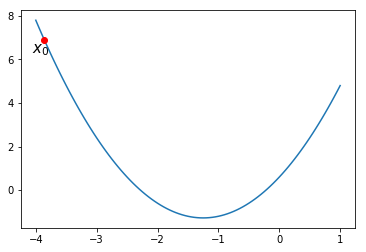

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A,B,C = 1.2, 3.0, 0.6                         # coefficients of objective functions
x_min, x_max = -4, 1                          # range of x
x0 = x_min + np.random.random()*(x_max-x_min) # randomly pick a point in the given range

f = lambda x: A*x**2 + B*x + C

x = np.linspace(-4,1,101)
plt.plot(x,  f(x))
plt.plot(x0, f(x0), 'ro')
plt.text(x0-0.2, f(x0)-0.6, '$x_0$', fontsize=15)

plt.show()


## 17.2 Gradient Descent

Suppose we randomly pick a point $x_0$, How can we get the minimum value in this curve?
A wise way is to follow the derivatives. Let's always go downhill! 
Therefore, we will need some information about the derivatives of each step, and then move it a bit for each step.
$$x_{n+1} = x_n - \gamma f'(x_n)$$

in which $f'$ is the slope and $\gamma$ is the step length.

If $\gamma$ is very small and $f'$ can be acurately calculated. We should be able to get the minimum value soon.

In [2]:
def derivative(f,x, dx=0.02):
    return (f(x+dx)-f(x))/dx

def minimize(f, x0, dx=0.01, N=1000):
    
    x_now = x0
    converged = False
    
    for i in range(N):
        x_next = x_now - derivative(f, x_now)*dx
        if f(x_next) < f(x_now):
            x_now = x_next
            #print('New position: x=', x_now)
        else:
            converged = True
            break
    return converged, x_now, f(x_now)

            
converged, x_best, f_min = minimize(f, x0)
print('x0: ', x0, '   converged: ', converged, '   Best solution: x=', x_best, 'f=', f_min)


x0:  -3.857634636364139    converged:  False    Best solution: x= -1.2600000000731808 f= -1.2748799999982436


In [3]:
# let's try to pick different random numbers and repeat it for a couple of times

for i in range(10):
    x1 = x_min + np.random.random()*(x_max-x_min)
    converged, x_best, f_min = minimize(f, x1)
    print('x0: ', x0, '   converged: ', converged, '   Best solution: x=', x_best, 'f=', f_min)


x0:  -3.857634636364139    converged:  False    Best solution: x= -1.2600000000100244 f= -1.2748799999997593
x0:  -3.857634636364139    converged:  True    Best solution: x= -1.2500484867579176 f= -1.2749999971788415
x0:  -3.857634636364139    converged:  True    Best solution: x= -1.2499953007147422 f= -1.2749999999735002
x0:  -3.857634636364139    converged:  True    Best solution: x= -1.2499077904154037 f= -1.274999989796871
x0:  -3.857634636364139    converged:  True    Best solution: x= -1.249881190027413 f= -1.2749999830610288
x0:  -3.857634636364139    converged:  True    Best solution: x= -1.249951923744245 f= -1.2749999972264083
x0:  -3.857634636364139    converged:  False    Best solution: x= -1.2600000000546783 f= -1.2748799999986877
x0:  -3.857634636364139    converged:  False    Best solution: x= -1.2600000000562337 f= -1.27487999999865
x0:  -3.857634636364139    converged:  True    Best solution: x= -1.2500174919511675 f= -1.274999999632838
x0:  -3.857634636364139    conv

In [4]:
# Here is a bit more complicated way to organize the data with the help of pandas
import pandas as pd

x_init = []
convergence = []
x_bests = []
f_mins = []

for i in range(10):
    x1 = x_min + np.random.random()*(x_max-x_min)
    converged, x_best, f_min = minimize(f, x1)
    x_init.append(x1)
    convergence.append(converged)
    x_bests.append(x_best)
    f_mins.append(f_min)
    
    
col_name = {'x0':x_init, 'convergence':convergence, 'x_min':x_bests, 'f_min': f_mins}
df = pd.DataFrame(col_name)


In [5]:
df

,convergence,f_min,x0,x_min
0,False,-1.27488,-1.495078,-1.260000
1,False,-1.27488,-2.033800,-1.260000
2,False,-1.27488,-1.514835,-1.260000
3,True,-1.27500,0.404994,-1.250107
4,False,-1.27488,-2.103961,-1.260000
5,False,-1.27488,-3.611052,-1.260000
6,True,-1.27500,-0.674679,-1.250115
7,False,-1.27488,-2.782184,-1.260000
8,True,-1.27500,-0.486357,-1.249999
9,False,-1.27488,-3.632825,-1.260000


## 17.3 Variable step size


From the above data, it is quite clear that the algorithm is not very efficient and highly sensitive to the choice of
step size $\gamma$. With certain assumptions on the function $F$ and particular choices of $\gamma$  (e.g., chosen either via a line search that satisfies the Wolfe conditions or the Barzilai-Borwein method shown as following):

$$ \gamma_n = \frac{(x_n-x_{n-1})^T [\nabla f(x_n) - \nabla f(x_{n-1})]} {||\nabla f(x_n) - \nabla f(x_{n-1})||^2} $$

For the 1d case, the equation returns to:

$$ \gamma_n = \frac{(x_n-x_{n-1})} {\nabla f(x_n) - \nabla f(x_{n-1}) }  $$

In [6]:
# variable stepwidth

def minimize2(f, x0, N=1000):
    
    x_now = x0
    x_prev = None
    converged = False
    
    for i in range(N):
        if x_prev is None:
            dx = 0.01
        else:
            dfx = derivative(f, x_now) - derivative(f, x_prev)
            dx = (x_now - x_prev)/dfx
        x_next = x_now - derivative(f, x_now)*dx
        
        if f(x_next) < f(x_now):
            x_prev = x_now
            x_now = x_next

        else:
            converged = True
            break
    return converged, x_now, f(x_now)

converged, x_best, f_min = minimize2(f, x0)
print('x0: ', x0, '   converged: ', converged, '   Best solution: x=', x_best, 'f=', f_min)


x0:  -3.857634636364139    converged:  True    Best solution: x= -1.2599999999986573 f= -1.2748800000000324


In [7]:
# Try many times again
for i in range(10):
    x1 = x_min + np.random.random()*(x_max-x_min)
    converged, x_best, f_min = minimize2(f, x1)
    print('x0: ', x0, '   converged: ', converged, '   Best solution: x=', x_best, 'f=', f_min)

x0:  -3.857634636364139    converged:  True    Best solution: x= -1.2599999999999965 f= -1.2748800000000005
x0:  -3.857634636364139    converged:  True    Best solution: x= -1.2599999999999743 f= -1.274880000000001
x0:  -3.857634636364139    converged:  True    Best solution: x= -1.259999999999998 f= -1.27488
x0:  -3.857634636364139    converged:  True    Best solution: x= -1.2599999999999991 f= -1.2748800000000005
x0:  -3.857634636364139    converged:  True    Best solution: x= -1.2599999999991223 f= -1.2748800000000213
x0:  -3.857634636364139    converged:  True    Best solution: x= -1.2599999999998834 f= -1.2748800000000027
x0:  -3.857634636364139    converged:  True    Best solution: x= -1.2599999999999958 f= -1.27488
x0:  -3.857634636364139    converged:  True    Best solution: x= -1.2599999999995426 f= -1.2748800000000116
x0:  -3.857634636364139    converged:  True    Best solution: x= -1.2599999999994793 f= -1.2748800000000124
x0:  -3.857634636364139    converged:  True    Best 

## 17.4 2D example
The above formula could also be extended to 2D, such as the function below,

$$ f(x, y) = x^2/2 + y^2/4$$

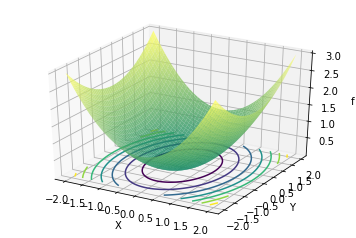

In [8]:
#%matplotlib notebook 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_min, x_max = -2, 2                          # range of x
y_min, y_max = -2, 2                          # range of x

def f2(x,y):
    return 1/2*x**2 + 1/4*y**2

nx = np.linspace(x_min,x_max,100)
ny = np.linspace(y_min,y_max,100)

x,y = np.meshgrid(nx,ny)

z = f2(x, y)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z, cmap='summer', alpha=0.8)
cset = ax.contour(x,y,z, zdir='z', offset=0)
#cset = ax.contour(x,y,z, zdir='x')
#cset = ax.contour(x,y,z, zdir='y')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f')

plt.show()


## 17.5 Homework

Write a code to solve the minimum of 2D function with monte Carlo method.
